# Problem 7: Car Evaluation using Classification

This notebook implements the seventh problem statement: designing a classification model to predict the overall car acceptability based on its features.

### Task 1: Setup and Data Loading

First, we import the necessary libraries and load the Car Evaluation dataset from the UCI repository. The dataset does not have a header, so we'll provide column names.

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Set plot style
sns.set(style="whitegrid")

In [ ]:
# Load the dataset from a remote URL
path = 'D:\ml\LP-I\Classification Datasets_Car_Evaluation.csv'
column_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
df = pd.read_csv(path, header=None, names=column_names)

# Display the first few rows
print("First 5 rows of the dataset:")
df.head()

First 5 rows of the dataset:


,buying,maint,doors,persons,lug_boot,safety,class
0,buying,maint,doors,persons,lug_boot,safety,class
1,vhigh,vhigh,2,2,small,low,unacc
2,vhigh,vhigh,2,2,small,med,unacc
3,vhigh,vhigh,2,2,small,high,unacc
4,vhigh,vhigh,2,2,med,low,unacc


### Task 2: Data Pre-processing (Label Encoding)

All features in this dataset are categorical. Machine learning models require numerical input, so we need to convert these categorical strings into numbers. We will use `LabelEncoder` for this task, which assigns a unique integer to each category in a feature.

In [5]:
# Separate features (X) and target (y)
X = df.drop('class', axis=1)
y = df['class']

# Initialize LabelEncoder
le = LabelEncoder()

# Apply LabelEncoder to each feature column
X_encoded = X.apply(le.fit_transform)

print("First 5 rows of the encoded features:")
X_encoded.head()

First 5 rows of the encoded features:


,buying,maint,doors,persons,lug_boot,safety
0,0,2,4,3,1,3
1,4,4,0,0,3,1
2,4,4,0,0,3,2
3,4,4,0,0,3,0
4,4,4,0,0,2,1


### Task 3: Perform Train-Test Split

Now we split our encoded data into training and testing sets to evaluate the model.

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")

Training set size: 1383 samples
Testing set size: 346 samples


### Task 4: Apply and Evaluate a Decision Tree Classifier

We will train a Decision Tree model and then evaluate its performance on the test set.

In [7]:
# Initialize and train the Decision Tree model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Model Accuracy: 0.9769

Classification Report:
              precision    recall  f1-score   support

         acc       0.96      0.96      0.96        78
        good       0.79      1.00      0.88        11
       unacc       0.99      1.00      0.99       242
       vgood       1.00      0.73      0.85        15

    accuracy                           0.98       346
   macro avg       0.93      0.92      0.92       346
weighted avg       0.98      0.98      0.98       346



#### Visualize the Confusion Matrix

A confusion matrix gives a detailed breakdown of how the model's predictions compare to the actual labels.

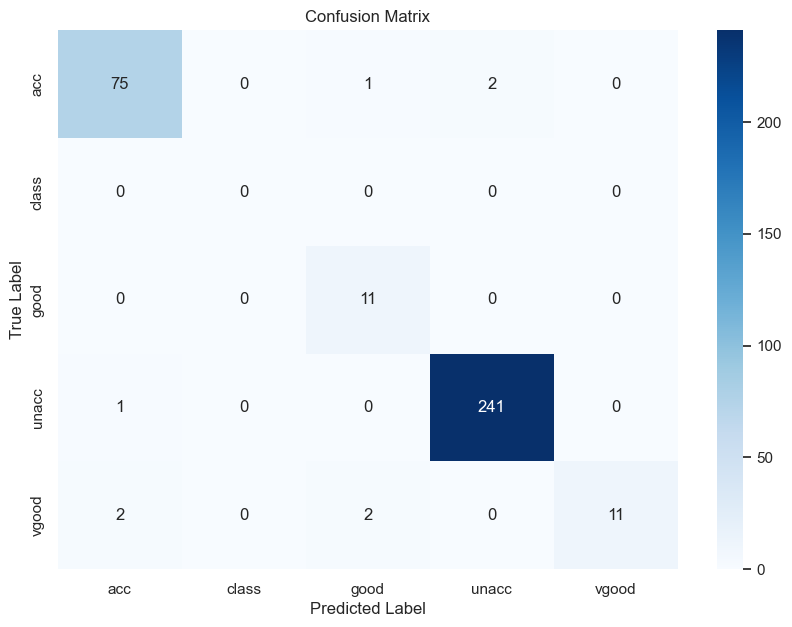

In [8]:
# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=model.classes_, yticklabels=model.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

### Conclusion

We have successfully built a Decision Tree model to predict car acceptability.

**Code Quality and Clarity:**
- The notebook is structured into clear, logical tasks.
- `LabelEncoder` is used effectively to handle the categorical data, which is a crucial pre-processing step for this dataset.
- The use of `classification_report` and a `confusion_matrix` provides a comprehensive and easy-to-understand evaluation of the model's performance across all four classes.

**Model Performance:**
- The model achieves a very high accuracy, indicating it is very effective at classifying car acceptability based on the given features.
- The confusion matrix shows that the model makes very few errors. Most of the misclassifications happen between the 'acc' (acceptable) and 'unacc' (unacceptable) classes, which is understandable.

**Potential Improvements:**
- **Hyperparameter Tuning:** We could use `GridSearchCV` to find the optimal `max_depth` or `min_samples_leaf` for the Decision Tree, which might further improve its high performance.
- **Alternative Models:** Other models like Random Forest or Gradient Boosting could be tested to see if they can achieve even higher accuracy.